# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [3]:
pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('pca', PCA()),
                ('logistic',
                 SGDClassifier(loss='log', max_iter=100, penalty='l1',
                               random_state=0, tol=1e-05))])>

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [5]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5)
}
grid = GridSearchCV(estimator=pipe, param_grid=param_grid)
grid.fit(X_digits, y_digits)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        SGDClassifier(loss='log', max_iter=100,
                                                      penalty='l1',
                                                      random_state=0,
                                                      tol=1e-05))]),
             param_grid={'logistic__alpha': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'pca__n_components': [4, 10, 20, 30, 40, 50, 64]})

In [9]:
print(grid.best_params_)
print(grid.best_score_)

{'logistic__alpha': 0.01, 'pca__n_components': 30}
0.9109718353450944


Text(0, 0.5, 'PCA explained variance ratio')

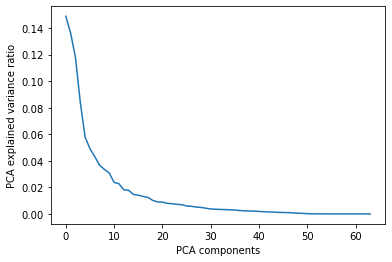

In [17]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('PCA components')
plt.ylabel('PCA explained variance ratio')

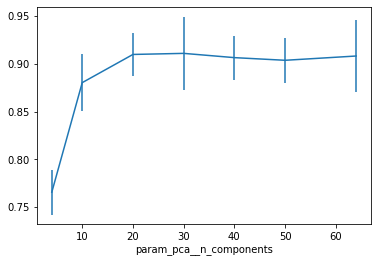

In [19]:
# 繪製不同採樣點的分類正確率
res = pd.DataFrame(grid.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = res.groupby(components_col).apply(lambda x: x.nlargest(1, 'mean_test_score'))
best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False)